In [3]:
import os

dir_path = 'scripts/data/DESKTOP-GNJ2QLV_2025-03-15'
txt_files = [f for f in os.listdir(dir_path) if f.endswith('.txt')]

file1_path = os.path.join(dir_path, txt_files[1])
with open(file1_path, 'r', encoding='utf-8') as f:
    sizes = f.read()

file2_path = os.path.join(dir_path, txt_files[0])
with open(file2_path, 'r', encoding='utf-8') as f:
    first_benchmark = f.read()

In [38]:
sizes

'Size: 100\nSize: 100\nSize: 100\nSize: 100\nSize: 100\nSize: 1000\nSize: 1000\nSize: 1000\nSize: 1000\nSize: 1000\nSize: 10000\nSize: 10000\nSize: 10000\nSize: 10000\nSize: 10000\nSize: 100000\nSize: 100000\nSize: 100000\nSize: 100000\nSize: 100000\nSize: 1000000\nSize: 1000000\nSize: 1000000\nSize: 1000000\nSize: 1000000\n'

In [39]:
first_benchmark

'Size: 100\nSequential quicksort took: 0.000008 sec.\nParallel quicksort took: 0.014563 sec.\nBuilt-in quicksort took: 0.000006 sec.\nSize: 100\nSequential quicksort took: 0.000007 sec.\nParallel quicksort took: 0.011047 sec.\nBuilt-in quicksort took: 0.000007 sec.\nSize: 100\nSequential quicksort took: 0.000007 sec.\nParallel quicksort took: 0.010475 sec.\nBuilt-in quicksort took: 0.000008 sec.\nSize: 100\nSequential quicksort took: 0.000007 sec.\nParallel quicksort took: 0.011568 sec.\nBuilt-in quicksort took: 0.000007 sec.\nSize: 100\nSequential quicksort took: 0.000007 sec.\nParallel quicksort took: 0.010101 sec.\nBuilt-in quicksort took: 0.000006 sec.\nSize: 1000\nSequential quicksort took: 0.000091 sec.\nParallel quicksort took: 0.039295 sec.\nBuilt-in quicksort took: 0.000088 sec.\nSize: 1000\nSequential quicksort took: 0.000089 sec.\nParallel quicksort took: 0.032084 sec.\nBuilt-in quicksort took: 0.000098 sec.\nSize: 1000\nSequential quicksort took: 0.000089 sec.\nParallel qui

In [6]:
!pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 5.6 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.5 MB 5.5 MB/s eta 0:00:02
   ------------ --------------------------- 3.7/11.5 MB 6.0 MB/s eta 0:00:02
   ---------------- ----------------------- 4.7/11.5 MB 5.9 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.5 MB 5.5 MB/s eta 0:00:02
   ----------------------- ---------------- 6.8/11.5 MB 5.5 MB/s eta 0:00:01
   --------------------------- ------------ 7.9/11.5 MB 5.4 MB/s eta 0:00:01
   ------------------------------- -------- 8.9/11.5 MB 5.4 MB/s eta 0:00:01
   ------------------------------------ --- 10.5/11.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 5.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import pandas as pd
import re

def benchmark_to_dataframe(content):
    pattern = r"Size: (\d+)\nSequential quicksort took: ([\d.]+) sec\.\nParallel quicksort took: ([\d.]+) sec\.\nBuilt-in quicksort took: ([\d.]+) sec\."
    matches = re.findall(pattern, content)

    data = []
    for size, seq_time, par_time, built_in_time in matches:
        data.append({"size": int(size), "type": "sequential", "runtime": float(seq_time)})
        data.append({"size": int(size), "type": "parallel", "runtime": float(par_time)})
        data.append({"size": int(size), "type": "built-in", "runtime": float(built_in_time)})

    df = pd.DataFrame(data)
    return df

df_initial_version = benchmark_to_dataframe(first_benchmark)

In [41]:
df_initial_version.head()

,size,type,runtime
0,100,sequential,0.000008
1,100,parallel,0.014563
2,100,built-in,0.000006
3,100,sequential,0.000007
4,100,parallel,0.011047


In [12]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_24896\3034923699.py:13: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data=df, x="size", y="runtime", hue="type", marker="o", palette=palette)


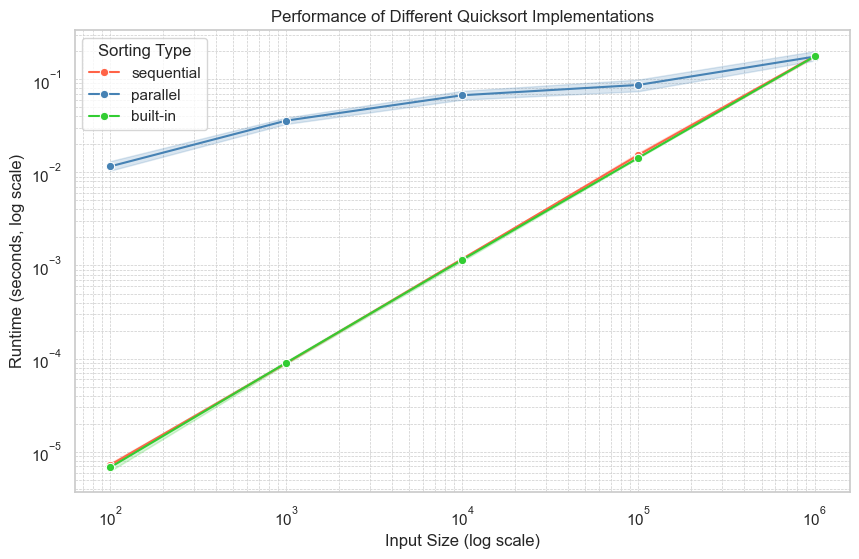

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plt_benchmark(df):
    sns.set(style="whitegrid")
    palette = ["#FF6347", "#4682B4", "#32CD32", "#8A2BE2", "#FFD700"]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="size", y="runtime", hue="type", marker="o", palette=palette)

    plt.xscale("log")  # Log scale for better readability
    plt.yscale("log")  # Log scale for time
    plt.xlabel("Input Size (log scale)")
    plt.ylabel("Runtime (seconds, log scale)")
    plt.title("Performance of Different Quicksort Implementations")
    plt.legend(title="Sorting Type")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    plt.show()

plt_benchmark(df_initial_version)

#### The problem with the initial benchmark code is that it only considers input size up to 10 to power of 6 and we can't see the different after that. I changed it and it can benchmark up to 10 to the power 7.

In [51]:
import os
import glob

txt_files = glob.glob(os.path.join(dir_path, "*.txt"))
newest_file = max(txt_files, key=os.path.getmtime)
print(newest_file)

with open(newest_file, 'r', encoding='utf-8') as f:
    second_experiment = f.read()
print(second_experiment)

scripts/data/DESKTOP-GNJ2QLV_2025-03-15\measurements_2256.txt
Size: 100
Sequential quicksort took: 0.000008 sec.
Parallel quicksort took: 0.014008 sec.
Built-in quicksort took: 0.000006 sec.
Size: 100
Sequential quicksort took: 0.000007 sec.
Parallel quicksort took: 0.010669 sec.
Built-in quicksort took: 0.000006 sec.
Size: 100
Sequential quicksort took: 0.000006 sec.
Parallel quicksort took: 0.010437 sec.
Built-in quicksort took: 0.000007 sec.
Size: 100
Sequential quicksort took: 0.000007 sec.
Parallel quicksort took: 0.009221 sec.
Built-in quicksort took: 0.000007 sec.
Size: 100
Sequential quicksort took: 0.000007 sec.
Parallel quicksort took: 0.010176 sec.
Built-in quicksort took: 0.000007 sec.
Size: 100
Sequential quicksort took: 0.000006 sec.
Parallel quicksort took: 0.009646 sec.
Built-in quicksort took: 0.000007 sec.
Size: 1000
Sequential quicksort took: 0.000096 sec.
Parallel quicksort took: 0.029063 sec.
Built-in quicksort took: 0.000096 sec.
Size: 1000
Sequential quicksort t

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_24896\3034923699.py:13: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data=df, x="size", y="runtime", hue="type", marker="o", palette=palette)


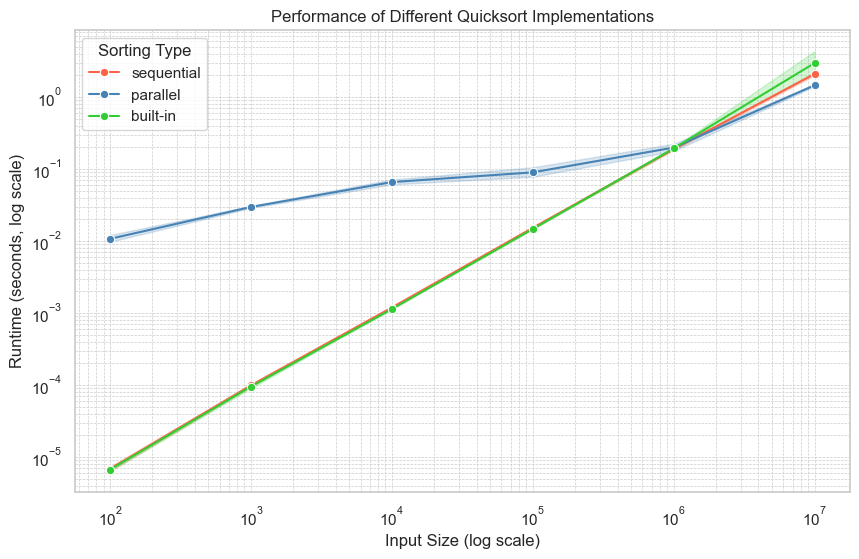

In [52]:
df_second_version = benchmark_to_dataframe(second_experiment)
plt_benchmark(df_second_version)

#### So here, we can see that the algorithm is slighly better in terms of runtime when the input size is larger than 10^6.